# Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from catboost import CatBoostClassifier
import ctypes
import time
import xgboost as xg
from sklearn.model_selection import ParameterSampler
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"model.csv")

In [5]:
df.columns

Index(['Elevation', 'Slope', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16', 'Soil_Type_17',
       'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
       'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Tv', 'Aspectr2',
       'Horizontal_Di

In [6]:

ros = RandomOverSampler(random_state=42)
smo = SMOTE(random_state=42)
ada=ADASYN(random_state=42)
scaler = StandardScaler()
cv=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
X = df.drop(['Tv','Vertical_Distance_To_Hydrology'], axis=1)
y = df['Tv']
x_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X1 = df.drop(['Tv', 'Horizontal_Distance_To_Roadways', 'Hillshade_3pm','Vertical_Distance_To_Hydrology'], axis=1)
y1= df[['Tv']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)


In [5]:
def show_popup(title, message):
    # ctypes.windll.user32.MessageBoxW(hWnd, Text, Caption, uType)
    # 0 is the owner window handle (none in this case)
    # The last parameter (0) means "OK" button only
    ctypes.windll.user32.MessageBoxW(0, message, title, 0)


# show_popup("Task Complete", "Hyperparameter tuning is done!")


## Logistic Regression

In [6]:
logmodel = LogisticRegression()

# Build pipeline
pipe = Pipeline([
    ('Smote', smo),      
    ('scaler', scaler),       
    ('model', logmodel)
])

# Fit
pipe.fit(X_train1, y_train1)
y_train_pred = pipe.predict(X_train1)
y_test_pred = pipe.predict(X_test1)
print('Training Accuracy :', np.round(accuracy_score(y_train1, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train1, y_train_pred, average='weighted'), 3))
print('Training Recall :', np.round(recall_score(y_train1, y_train_pred, average='weighted'), 3))
print('Training F1 Score :', np.round(f1_score(y_train1, y_train_pred, average='weighted'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test1, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test1, y_test_pred, average='weighted'), 3))
print('Testing Recall :', np.round(recall_score(y_test1, y_test_pred, average='weighted'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test1, y_test_pred, average='weighted'), 3))
cm = confusion_matrix(y_test1, y_test_pred)
clm=classification_report(y_test1, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.688
Training Precision : 0.78
Training Recall : 0.688
Training F1 Score : 0.719

Testing Accuracy : 0.687
Testing Precision : 0.779
Testing Recall : 0.687
Testing F1 Score : 0.717
[[  393     0    20     0   109    12    24]
 [    0    30     0     0     0     0     0]
 [   10    17   187     0     1    56     0]
 [    1     0     0   255     0     0     4]
 [ 2269     1    23    14 14040    10  3965]
 [   16    14    39     0     0   150     0]
 [  230     0     3   156  1714     2  4057]]
              precision    recall  f1-score   support

           0       0.13      0.70      0.23       558
           1       0.48      1.00      0.65        30
           2       0.69      0.69      0.69       271
           3       0.60      0.98      0.74       260
           4       0.89      0.69      0.78     20322
           5       0.65      0.68      0.67       219
           6       0.50      0.66      0.57      6162

    accuracy                           0.69     

In [ ]:
logmodel = LogisticRegression()

# Build pipeline
pipe = Pipeline([
    ('Smote', smo),      
    ('scaler', scaler),       
    ('log_reg', logmodel)
])

param_distributions = {
    'log_reg__C': [0.01, 0.1, 1,10],
    'log_reg__max_iter':[100,500,1000],
    'log_reg__solver': ['newton-cg', 'saga','newton-cholesky','lbfgs'],
    'log_reg__penalty': ['l2','l1'],
    'log_reg__multi_class':['multinomial'] 
}

rand_search_log = RandomizedSearchCV(
    pipe,
    param_distributions,
    cv=cv,
    scoring='f1_weighted',  
    n_jobs=8,
    verbose=2,
)
rand_search_log.fit(X_train1, y_train1)
y_train_pred = rand_search_log.predict(X_train1)
y_test_pred = rand_search_log.predict(X_test1)
print('Training Accuracy :', np.round(accuracy_score(y_train1, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train1, y_train_pred, average='weighted'), 3))
print('Training Recall :', np.round(recall_score(y_train1, y_train_pred, average='weighted'), 3))
print('Training F1 Score :', np.round(f1_score(y_train1, y_train_pred, average='weighted'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test1, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test1, y_test_pred, average='weighted'), 3))
print('Testing Recall :', np.round(recall_score(y_test1, y_test_pred, average='weighted'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test1, y_test_pred, average='weighted'), 3))
cm = confusion_matrix(y_test1, y_test_pred)
clm=classification_report(y_test1, y_test_pred)
print(cm)
print(clm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training Accuracy : 0.692
Training Precision : 0.781
Training Recall : 0.692
Training F1 Score : 0.721

Testing Accuracy : 0.688
Testing Precision : 0.778
Testing Recall : 0.688
Testing F1 Score : 0.718
[[  378     0    25     0   113    19    23]
 [    0    30     0     0     0     0     0]
 [    8    22   190     0     1    50     0]
 [    0     0     0   252     0     1     7]
 [ 2144     1    26    24 14119    11  3997]
 [   14    20    38     0     0   147     0]
 [  246     0     5   178  1696     2  4035]]
              precision    recall  f1-score   support

           0       0.14      0.68      0.23       558
           1       0.41      1.00      0.58        30
           2       0.67      0.70      0.68       271
           3       0.56      0.97      0.71       260
           4       0.89      0.69      0.78     20322
           5       0.64      0.67      0.65       219
           6       0.50      0.65      0.

- Logistic Regression is Underfitting so moving to next algorithm

# KNN Classifier

[0.74, 0.744, 0.742, 0.747, 0.744, 0.749, 0.747, 0.751, 0.749, 0.752, 0.75, 0.753, 0.752, 0.754, 0.752, 0.755, 0.754, 0.755, 0.754, 0.756, 0.755, 0.757, 0.757, 0.758, 0.758, 0.759, 0.758, 0.759, 0.759, 0.76, 0.759, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.761, 0.76, 0.761, 0.761, 0.762, 0.761, 0.762, 0.762, 0.762, 0.762]


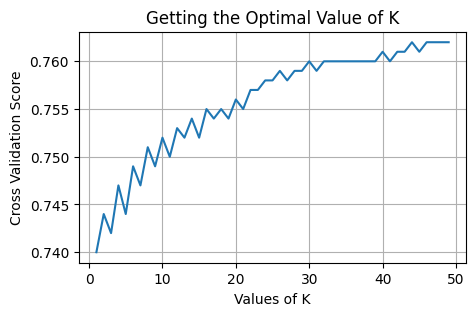

In [ ]:
#Getting the Optimal Value of K
k_range = range(1, 50)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_scaled, y, cv = 10,scoring='f1_weighted')
    k_scores.append(scores.mean().round(3))

print(k_scores)
# Line Plot 
plt.figure(figsize = (5, 3))
plt.plot(k_range, k_scores)
plt.title('Optimal Value of K')
plt.xlabel('Values of K')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors= 26)

# Building pipeline
pipe = Pipeline([
    ('Smote', smo),      
    ('scaler', scaler),       
    ('model', model_knn)
])

# Fit
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.874
Training Precision : 0.759
Training Recall : 0.936
Training F1 Score : 0.823

Testing Accuracy : 0.853
Testing Precision : 0.698
Testing Recall : 0.885
Testing F1 Score : 0.764
[[  520     0    11     0    17     8     2]
 [    0    28     1     0     0     1     0]
 [    5     8   233     0     0    25     0]
 [    3     0     1   248     2     0     6]
 [  859     0    32    28 17290    17  2096]
 [    8     3    30     0     0   178     0]
 [  133     0    17    98   668     1  5245]]
              precision    recall  f1-score   support

           0       0.34      0.93      0.50       558
           1       0.72      0.93      0.81        30
           2       0.72      0.86      0.78       271
           3       0.66      0.95      0.78       260
           4       0.96      0.85      0.90     20322
           5       0.77      0.81      0.79       219
           6       0.71      0.85      0.78      6162

    accuracy                           0.85    

In [11]:
model_knn = KNeighborsClassifier(n_neighbors= 20)

# Build pipeline
pipe = Pipeline([
    ('Ros', ros),      
    ('scaler', scaler),       
    ('model', model_knn)
])

# Fit
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.884
Training Precision : 0.824
Training Recall : 0.97
Training F1 Score : 0.876

Testing Accuracy : 0.86
Testing Precision : 0.732
Testing Recall : 0.877
Testing F1 Score : 0.782
[[  524     0    10     0    13     4     7]
 [    0    27     2     0     0     1     0]
 [   13     1   230     0     0    27     0]
 [    3     0     0   250     0     0     7]
 [  777     0    32    20 17225    17  2251]
 [   13     4    37     0     0   165     0]
 [   93     0    11    62   499     2  5495]]
              precision    recall  f1-score   support

           0       0.37      0.94      0.53       558
           1       0.84      0.90      0.87        30
           2       0.71      0.85      0.78       271
           3       0.75      0.96      0.84       260
           4       0.97      0.85      0.91     20322
           5       0.76      0.75      0.76       219
           6       0.71      0.89      0.79      6162

    accuracy                           0.86     2

In [ ]:

pipe = Pipeline([
    ('Ros', ros),    
    ('scaler', scaler),       
    ('model', model_knn)
])


param_distributions = {
    'model__n_neighbors': [30,26,20,16],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['manhattan', 'euclidean'],
    'model__p': [1, 2],
    'model__leaf_size': [15, 30, 45, 60],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree']
}
cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=25,             
    cv=cv,                  # 5-fold cross-validation
    scoring='f1_macro',
    verbose=2,
    random_state=42,
    n_jobs=8
)

# Fit randomized search
random_search.fit(X_train, y_train)

y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)




Fitting 3 folds for each of 25 candidates, totalling 75 fits
Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.879
Testing Precision : 0.744
Testing Recall : 0.877
Testing F1 Score : 0.793
[[  526     0     5     0    15     5     7]
 [    0    25     3     0     0     2     0]
 [   12     3   230     0     0    26     0]
 [    4     0     0   248     1     0     7]
 [  598     0    32    19 17600    16  2057]
 [    9     4    36     0     0   170     0]
 [   70     0    13    44   367     2  5666]]
              precision    recall  f1-score   support

           0       0.43      0.94      0.59       558
           1       0.78      0.83      0.81        30
           2       0.72      0.85      0.78       271
           3       0.80      0.95      0.87       260
           4       0.98      0.87      0.92     20322
           5       0.77      0.78      0.77       219
           6       0.73      0.92      0.82      

In [13]:
print(random_search.best_params_)
print(random_search.best_score_)

{'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 16, 'model__metric': 'manhattan', 'model__leaf_size': 30, 'model__algorithm': 'ball_tree'}
0.7601712543710771


- KNN classifiers are overfitting

# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()

dtc_pipe = Pipeline([
    ('Smote', smo),    
    ('model', model)
])

# Fit
dtc_pipe.fit(X_train, y_train)
y_train_pred = dtc_pipe.predict(X_train)
y_test_pred = dtc_pipe.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.943
Testing Precision : 0.855
Testing Recall : 0.862
Testing F1 Score : 0.858
[[  473     0     7     0    60     8    10]
 [    0    25     2     0     0     3     0]
 [    5     0   228     0     3    33     2]
 [    0     0     0   230     4     0    26]
 [   81     0    12     4 19568     9   648]
 [   13     3    29     0     7   167     0]
 [   12     0     3    33   566     2  5546]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       558
           1       0.89      0.83      0.86        30
           2       0.81      0.84      0.83       271
           3       0.86      0.88      0.87       260
           4       0.97      0.96      0.97     20322
           5       0.75      0.76      0.76       219
           6       0.89      0.90      0.89      6162

    accuracy                           0.94     27822
 

In [ ]:
# Splitting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit base model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Get cost-complexity pruning path
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
models = []
train_scores = []
val_scores = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    models.append(model)
    train_scores.append(train_score)
    val_scores.append(val_score)

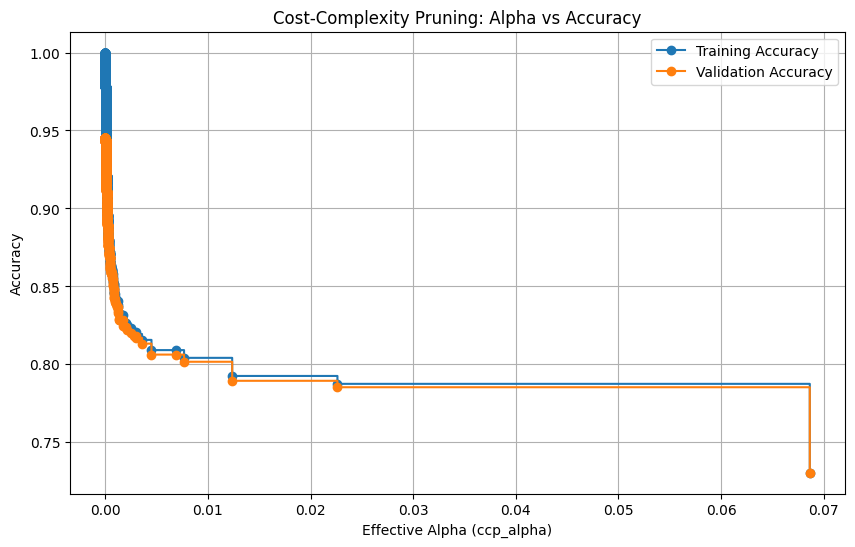

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label='Validation Accuracy', drawstyle="steps-post")
plt.xlabel('Effective Alpha (ccp_alpha)')
plt.ylabel('Accuracy')
plt.title('Cost-Complexity Pruning: Alpha vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
best_alpha = ccp_alphas[np.argmax(val_scores)]
print("Best alpha:", best_alpha)

pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

print("Validation Accuracy (after pruning):", pruned_tree.score(X_val, y_val))


Best alpha: 1.3317278314941924e-05
Validation Accuracy (after pruning): 0.9452591474372799


In [7]:
model = DecisionTreeClassifier(ccp_alpha=1.3317278314941924e-05)

# Build pipeline
dtc_pipe = Pipeline([
    ('Adasyn', ada),    
    ('model', model)
])

# Fit
dtc_pipe.fit(X_train, y_train)
y_train_pred = dtc_pipe.predict(X_train)
y_test_pred = dtc_pipe.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.95
Training Precision : 0.898
Training Recall : 0.955
Training F1 Score : 0.925

Testing Accuracy : 0.925
Testing Precision : 0.815
Testing Recall : 0.875
Testing F1 Score : 0.843
[[  487     0     3     0    38    12    18]
 [    0    24     1     0     0     5     0]
 [    3     3   232     0     0    33     0]
 [    1     0     0   239     0     0    20]
 [  143     0    19     9 18881    13  1257]
 [    9     4    24     0     0   180     2]
 [   13     0     3    38   403     2  5703]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       558
           1       0.77      0.80      0.79        30
           2       0.82      0.86      0.84       271
           3       0.84      0.92      0.88       260
           4       0.98      0.93      0.95     20322
           5       0.73      0.82      0.78       219
           6       0.81      0.93      0.87      6162

    accuracy                           0.93     

In [73]:
model_dtctune = DecisionTreeClassifier()

pipe = Pipeline([
    ('Adasyn', ada),           
    ('model_dtctune', model_dtctune)
])
param_distributions = {
    'model_dtctune__criterion': ['gini'],
    'model_dtctune__max_depth': [10, 15, 20, 25, 30, None],
    'model_dtctune__min_samples_split': [2, 4, 6, 8, 10, 20],
    'model_dtctune__min_samples_leaf': [1, 2, 3, 4, 5, 10],
    'model_dtctune__max_features': [None, 'sqrt', 'log2'],
    'model_dtctune__ccp_alpha': [0.0, 0.0001, 0.0005, 0.001]
}
random_search_dtc = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,             
    cv=cv,                  # 5-fold cross-validation
    scoring='f1_macro', 
    verbose=2,
    random_state=42,
    n_jobs=8
)

# Fit randomized search
random_search_dtc.fit(X_train, y_train)

y_train_pred = random_search_dtc.predict(X_train)
y_test_pred = random_search_dtc.predict(X_test)
print('\n',random_search_dtc.best_params_)
print(random_search_dtc.best_score_)
print('\nTraining Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

 {'model_dtctune__min_samples_split': 2, 'model_dtctune__min_samples_leaf': 2, 'model_dtctune__max_features': None, 'model_dtctune__max_depth': 25, 'model_dtctune__criterion': 'gini', 'model_dtctune__ccp_alpha': 0.0}
0.8170213546602844

Training Accuracy : 0.984
Training Precision : 0.946
Training Recall : 0.986
Training F1 Score : 0.964

Testing Accuracy : 0.937
Testing Precision : 0.828
Testing Recall : 0.882
Testing F1 Score : 0.853
[[  486     0     3     0    46     8    15]
 [    0    26     1     0     0     3     0]
 [    4     2   238     0     1    26     0]
 [    1     0     0   235     0     0    24]
 [  172     0    18    10 19367    11   744]
 [    9     4    27     0     2   175     2]
 [    8     0     3    41   570     1  5539]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.79       558
           1       0.81      0.87      0.84        30
           2       

In [77]:
print(random_search_dtc.best_params_)
print(random_search_dtc.best_score_)
random_search_dtc.scoring

{'model_dtctune__min_samples_split': 2, 'model_dtctune__min_samples_leaf': 2, 'model_dtctune__max_features': None, 'model_dtctune__max_depth': 25, 'model_dtctune__criterion': 'gini', 'model_dtctune__ccp_alpha': 0.0}
0.8170213546602844


'f1_macro'

In [88]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)

# Build pipeline
dtc_pipe = Pipeline([
    ('Adasyn', ada),    
    ('model', model)
])

# Fit
dtc_pipe.fit(X_train, y_train)
y_train_pred = dtc_pipe.predict(X_train)
y_test_pred = dtc_pipe.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.95
Training Precision : 0.898
Training Recall : 0.955
Training F1 Score : 0.925

Testing Accuracy : 0.925
Testing Precision : 0.812
Testing Recall : 0.873
Testing F1 Score : 0.841
[[  486     0     3     0    38    12    19]
 [    0    24     1     0     0     5     0]
 [    4     3   230     0     0    34     0]
 [    1     0     0   239     0     0    20]
 [  143     0    19     9 18876    13  1262]
 [   10     4    23     0     0   180     2]
 [   15     0     4    40   403     2  5698]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       558
           1       0.77      0.80      0.79        30
           2       0.82      0.85      0.83       271
           3       0.83      0.92      0.87       260
           4       0.98      0.93      0.95     20322
           5       0.73      0.82      0.77       219
           6       0.81      0.92      0.87      6162

    accuracy                           0.92     

In [ ]:
model_dtctune = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha,)

pipe = Pipeline([
    ('Adasyn', ada),           
    ('model_dtctune', model_dtctune)
])
param_distributions = {
    'model_dtctune__criterion': ['gini'],
    'model_dtctune__max_depth': [2,5,7,10, 15, 20, 25, 30, None],
    'model_dtctune__min_samples_split': [2, 4, 6, 8, 10, 20,30],
    'model_dtctune__min_samples_leaf': [5, 10, 20, 50],
    'model_dtctune__max_features': [None, 'sqrt', 'log2']
}
random_search_dtc = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,             
    cv=cv,                  # 5-fold cross-validation
    scoring='f1_macro', 
    verbose=2,
    random_state=42,
    n_jobs=8
)

# Fit randomized search
random_search_dtc.fit(X_train, y_train)

y_train_pred = random_search_dtc.predict(X_train)
y_test_pred = random_search_dtc.predict(X_test)
print('\n',random_search_dtc.best_params_)
print(random_search_dtc.best_score_)
print('\nTraining Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

 {'model_dtctune__min_samples_split': 10, 'model_dtctune__min_samples_leaf': 5, 'model_dtctune__max_features': None, 'model_dtctune__max_depth': 20, 'model_dtctune__criterion': 'gini'}
0.8069901922739798

Training Accuracy : 0.931
Training Precision : 0.863
Training Recall : 0.95
Training F1 Score : 0.901

Testing Accuracy : 0.908
Testing Precision : 0.779
Testing Recall : 0.87
Testing F1 Score : 0.818
[[  494     0     7     0    32    12    13]
 [    0    24     1     0     0     5     0]
 [    3     3   229     0     0    36     0]
 [    1     0     0   238     0     0    21]
 [  311     0    21     8 18429    13  1540]
 [    9     4    25     0     0   179     2]
 [   20     0     5    48   421     2  5666]]
              precision    recall  f1-score   support

           0       0.59      0.89      0.71       558
           1       0.77      0.80      0.79        30
           2       0.80      0.85      0.82       271

## Random Forest Classifier

In [ ]:
param_distributions = {
    'model_rf_tune__n_estimators': [25,50,75],
    'model_rf_tune__max_depth': [20,22, 23,21, None],
    'model_rf_tune__min_samples_split': [6,8,10],
    'model_rf_tune__min_samples_leaf': [6,8,10],
    'model_rf_tune__max_features': ['sqrt', None],
    'model_rf_tune__bootstrap': [True, False],
    'model_rf_tune__criterion': ['gini', 'entropy'],
    'model_rf_tune__class_weight': [None, 'balanced'],
      'model_rf_tune__ccp_alpha': [1.3317278314941924e-05]  
}

# param_distributions = {
#     'model_dtctune__criterion': ['gini','entropy'],
#     'model_dtctune__max_depth': [20,22, 23,21, None],
#     'model_dtctune__min_samples_split': [6, 8],
#     'model_dtctune__min_samples_leaf': [8,6],
#     'model_dtctune__max_features': [None, 'sqrt'],
#     'model_dtctune__ccp_alpha': [1.3317278314941924e-05]
# }
param_sampler = list(ParameterSampler(param_distributions, n_iter=25, random_state=42))

best_model = None
best_score = -np.inf
least_diff_model = None
least_diff = np.inf
best_params = None
least_diff_params = None

for i, params in enumerate(param_sampler, 1):
    # pipeline for this iteration
    model = Pipeline([
        ('Adasyn', ada), 
        ('model_rf_tune', RandomForestClassifier(**{k.replace('model_rf_tune__', ''): v for k, v in params.items()},
                                                 random_state=42))
    ])
    print(f"\nIteration {i} | Params: {params}")
    # Fit model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    train_prec = precision_score(y_train, y_train_pred, average='macro') * 100
    test_prec = precision_score(y_test, y_test_pred, average='macro') * 100
    diff = abs(train_prec - test_prec)
    test_f1 = f1_score(y_test, y_test_pred, average='macro') * 100

    print(f"\nIteration {i}: Train Precision={train_prec:.2f} | Test Precision={test_prec:.2f} | "
          f"Diff={diff:.2f} | Test F1={test_f1:.2f}")

    # Early stop condition
    if train_prec >= 85 and diff <= 5:#and test_prec >= 85
        print("Threshold met. Stopping search early.")
        best_model = model
        best_params = params
        break

    # Track best test precision model
    if test_prec > best_score:
        best_score = test_prec
        best_model = model
        best_params = params

    # Track least difference model
    if diff < least_diff:
        least_diff = diff
        least_diff_model = model
        least_diff_params = params

else:
    print(f"\n No model met the 85% precision threshold. Using least difference model (Diff={least_diff:.2f}%).")
    best_model = least_diff_model
    best_params = least_diff_params

# Evaluate final model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("\n Best Parameters:")
for k, v in best_params.items():
    print(f"   {k}: {v}")

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))

cm = confusion_matrix(y_test, y_test_pred)
clm = classification_report(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", clm)



Iteration 1 | Params: {'model_rf_tune__n_estimators': 25, 'model_rf_tune__min_samples_split': 6, 'model_rf_tune__min_samples_leaf': 6, 'model_rf_tune__max_features': None, 'model_rf_tune__max_depth': 21, 'model_rf_tune__criterion': 'entropy', 'model_rf_tune__class_weight': 'balanced', 'model_rf_tune__ccp_alpha': 1.3317278314941924e-05, 'model_rf_tune__bootstrap': False}

Iteration 1: Train Precision=91.58 | Test Precision=82.25 | Diff=9.33 | Test F1=84.81

Iteration 2 | Params: {'model_rf_tune__n_estimators': 75, 'model_rf_tune__min_samples_split': 6, 'model_rf_tune__min_samples_leaf': 10, 'model_rf_tune__max_features': 'sqrt', 'model_rf_tune__max_depth': 23, 'model_rf_tune__criterion': 'gini', 'model_rf_tune__class_weight': 'balanced', 'model_rf_tune__ccp_alpha': 1.3317278314941924e-05, 'model_rf_tune__bootstrap': True}

Iteration 2: Train Precision=87.31 | Test Precision=80.73 | Diff=6.58 | Test F1=85.02

Iteration 3 | Params: {'model_rf_tune__n_estimators': 25, 'model_rf_tune__min_

## BalancedRandomForestClassifier

In [32]:
from imblearn.ensemble import BalancedRandomForestClassifier

model_brf = BalancedRandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=20,
    sampling_strategy='auto',
    replacement=False
)

# Build pipeline
pipe_brf = Pipeline([
    ('smote', smo),          
    ('model_brf', model_brf)
])

# Fit
pipe_brf.fit(X_train, y_train)
y_train_pred = pipe_brf.predict(X_train)
y_test_pred = pipe_brf.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)


Training Accuracy : 0.973
Training Precision : 0.964
Training Recall : 0.992
Training F1 Score : 0.978

Testing Accuracy : 0.929
Testing Precision : 0.843
Testing Recall : 0.916
Testing F1 Score : 0.877
[[  515     0     4     0    29     8     2]
 [    0    28     0     0     0     2     0]
 [    3     1   250     0     0    17     0]
 [    0     0     0   251     1     0     8]
 [  116     0    23     7 19033    14  1129]
 [    5     4    29     0     0   181     0]
 [   26     0     4    33   509     2  5588]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       558
           1       0.85      0.93      0.89        30
           2       0.81      0.92      0.86       271
           3       0.86      0.97      0.91       260
           4       0.97      0.94      0.95     20322
           5       0.81      0.83      0.82       219
           6       0.83      0.91      0.87      6162

    accuracy                           0.93    

In [33]:
model_brf = BalancedRandomForestClassifier(
    random_state=0,
    n_estimators=200,
    max_depth=20,
    sampling_strategy='auto',
    ccp_alpha=1.3317278314941924e-05,
    replacement=False
)

# Build pipeline
pipe_brf = Pipeline([
    ('smote', smo),          
    ('model_brf', model_brf)
])

# Fit
pipe_brf.fit(X_train, y_train)
y_train_pred = pipe_brf.predict(X_train)
y_test_pred = pipe_brf.predict(X_test)
print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)



Training Accuracy : 0.934
Training Precision : 0.883
Training Recall : 0.971
Training F1 Score : 0.923

Testing Accuracy : 0.913
Testing Precision : 0.805
Testing Recall : 0.908
Testing F1 Score : 0.851
[[  520     0     5     0    23     8     2]
 [    0    27     0     0     0     3     0]
 [    2     1   248     0     0    20     0]
 [    0     0     0   256     0     0     4]
 [  163     0    25    15 18712    18  1389]
 [    4     4    33     0     0   178     0]
 [   38     0     7    68   573     2  5474]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       558
           1       0.84      0.90      0.87        30
           2       0.78      0.92      0.84       271
           3       0.76      0.98      0.85       260
           4       0.97      0.92      0.94     20322
           5       0.78      0.81      0.79       219
           6       0.80      0.89      0.84      6162

    accuracy                           0.91    

## XGB Classifier

In [ ]:
model_xg = XGBClassifier(
    # objective='multi:softprob',
    # eval_metric='mlogloss',
    # max_depth=4,
    # min_child_weight=5,
    # subsample=0.7,
    # colsample_bytree=0.7,
    # gamma=0.3,
    # reg_alpha=0.5,
    # reg_lambda=1,
    # learning_rate=0.05,
    # n_estimators=500
)

# Build pipeline
pipe_xg = Pipeline([
    ('Smote', smo),
    ('model', model_xg)
])

# Fit
pipe_xg.fit(X_train, y_train)


Pipeline(steps=[('Smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [119]:
# Evaluate performance
y_train_pred = pipe_xg.predict(X_train)
y_test_pred = pipe_xg.predict(X_test)

print('Training Accuracy :', np.round(accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall :', np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score :', np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

# Testing metrics
print('\nTesting Accuracy :', np.round(accuracy_score(y_test, y_test_pred), 3))
print('Testing Precision :', np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print('Testing Recall :', np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print('Testing F1 Score :', np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)
print(cm)
print(clm)

Training Accuracy : 0.936
Training Precision : 0.928
Training Recall : 0.973
Training F1 Score : 0.949

Testing Accuracy : 0.92
Testing Precision : 0.851
Testing Recall : 0.93
Testing F1 Score : 0.887
[[  533     0     3     0    13     9     0]
 [    0    30     0     0     0     0     0]
 [    2     1   257     0     0    11     0]
 [    0     0     0   254     1     0     5]
 [  158     0    16     8 18959    11  1170]
 [   10     3    24     0     1   181     0]
 [   14     0     4    37   726     1  5380]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       558
           1       0.88      1.00      0.94        30
           2       0.85      0.95      0.89       271
           3       0.85      0.98      0.91       260
           4       0.96      0.93      0.95     20322
           5       0.85      0.83      0.84       219
           6       0.82      0.87      0.85      6162

    accuracy                           0.92     2

In [ ]:

model_xg_hp = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=9,
    tree_method='hist'  # faster and memory efficient
)

# Build pipeline
pipe_xg_hp = Pipeline([
    ('Smote', smo),
    ('model_xg_hp', model_xg_hp)
])

# Parameter grid
param_distributions = {
    'model_xg_hp__n_estimators': [200, 300, 250],
    'model_xg_hp__max_depth': [20,25,30],
    'model_xg_hp__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model_xg_hp__subsample': [0.6, 0.8, 1.0],
    'model_xg_hp__colsample_bytree': [0.6, 0.8, 1.0],
    'model_xg_hp__gamma': [0, 0.1, 0.2, 0.3],
    'model_xg_hp__min_child_weight': [1, 3, 5, 7],
    'model_xg_hp__reg_lambda': [0.5, 1, 1.5, 2],  # L2 regularization
    'model_xg_hp__reg_alpha': [0, 0.1, 0.5, 1],   # L1 regularization
}

# RandomizedSearchCV
xg_hp = RandomizedSearchCV(
    estimator=pipe_xg_hp,
    param_distributions=param_distributions,
    n_iter=25,
    scoring='f1_macro', 
    cv=3,
    verbose=2,
    n_jobs=9,
    random_state=42
)

# Fit
xg_hp.fit(X_train, y_train)

# Best model
best_xg_pipe = xg_hp.best_estimator_
print("Best Parameters:\n", xg_hp.best_params_)

# Evaluate
y_train_pred = best_xg_pipe.predict(X_train)
y_test_pred = best_xg_pipe.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters:
 {'model_xg_hp__subsample': 1.0, 'model_xg_hp__reg_lambda': 0.5, 'model_xg_hp__reg_alpha': 0.5, 'model_xg_hp__n_estimators': 200, 'model_xg_hp__min_child_weight': 5, 'model_xg_hp__max_depth': 30, 'model_xg_hp__learning_rate': 0.1, 'model_xg_hp__gamma': 0.3, 'model_xg_hp__colsample_bytree': 0.6}

Training Accuracy : 0.997
Training Precision : 0.988
Training Recall : 0.999
Training F1 Score : 0.994

Testing Accuracy : 0.963
Testing Precision : 0.884
Testing Recall : 0.929
Testing F1 Score : 0.905


In [85]:

model_xg_hp = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=9,
    tree_method='hist'  # faster and memory efficient
)

# Build pipeline
pipe_xg_hp = Pipeline([
    ('Smote', smo),
    ('model_xg_hp', model_xg_hp)
])

# Parameter grid
param_distributions = {
    'model_xg_hp__n_estimators': [100, 200, 300, 400],
    'model_xg_hp__max_depth': [4, 6, 8, 10],
    'model_xg_hp__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model_xg_hp__subsample': [0.6, 0.8, 1.0],
    'model_xg_hp__colsample_bytree': [0.6, 0.8, 1.0],
    'model_xg_hp__gamma': [0, 0.1, 0.2, 0.3],
    'model_xg_hp__min_child_weight': [1, 3, 5, 7],
    'model_xg_hp__reg_lambda': [0.5, 1, 1.5, 2],  # L2 regularization
    'model_xg_hp__reg_alpha': [0, 0.1, 0.5, 1],   # L1 regularization
}

# RandomizedSearchCV
xg_hp = RandomizedSearchCV(
    estimator=pipe_xg_hp,
    param_distributions=param_distributions,
    n_iter=25,
    scoring='average_precision', #
    cv=3,
    verbose=2,
    n_jobs=9,
    random_state=42
)

# Fit
xg_hp.fit(X_train, y_train)

# Best model
best_xg_pipe = xg_hp.best_estimator_
print("Best Parameters:\n", xg_hp.best_params_)

# Evaluate
y_train_pred = best_xg_pipe.predict(X_train)
y_test_pred = best_xg_pipe.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters:
 {'model_xg_hp__subsample': 1.0, 'model_xg_hp__reg_lambda': 2, 'model_xg_hp__reg_alpha': 0.5, 'model_xg_hp__n_estimators': 400, 'model_xg_hp__min_child_weight': 1, 'model_xg_hp__max_depth': 10, 'model_xg_hp__learning_rate': 0.2, 'model_xg_hp__gamma': 0.3, 'model_xg_hp__colsample_bytree': 1.0}

Training Accuracy : 0.99
Training Precision : 0.985
Training Recall : 0.996
Training F1 Score : 0.991

Testing Accuracy : 0.957
Testing Precision : 0.88
Testing Recall : 0.935
Testing F1 Score : 0.906


In [86]:

model_xg_hp = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=9,
    tree_method='hist'  # faster and memory efficient
)

# Build pipeline
pipe_xg_hp = Pipeline([
    ('ada', ada),
    ('model_xg_hp', model_xg_hp)
])

# Parameter grid
param_distributions = {
    'model_xg_hp__n_estimators': [100, 200, 300, 400],
    'model_xg_hp__max_depth': [4, 6, 8, 10],
    'model_xg_hp__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model_xg_hp__subsample': [0.6, 0.8, 1.0],
    'model_xg_hp__colsample_bytree': [0.6, 0.8, 1.0],
    'model_xg_hp__gamma': [0, 0.1, 0.2, 0.3],
    'model_xg_hp__min_child_weight': [1, 3, 5, 7],
    'model_xg_hp__reg_lambda': [0.5, 1, 1.5, 2],  # L2 regularization
    'model_xg_hp__reg_alpha': [0, 0.1, 0.5, 1],   # L1 regularization
}

# RandomizedSearchCV
xg_hp = RandomizedSearchCV(
    estimator=pipe_xg_hp,
    param_distributions=param_distributions,
    n_iter=25,
    scoring='average_precision', #
    cv=3,
    verbose=2,
    n_jobs=9,
    random_state=42
)

# Fit
xg_hp.fit(X_train, y_train)

# Best model
best_xg_pipe = xg_hp.best_estimator_
print("Best Parameters:\n", xg_hp.best_params_)

# Evaluate
y_train_pred = best_xg_pipe.predict(X_train)
y_test_pred = best_xg_pipe.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters:
 {'model_xg_hp__subsample': 0.6, 'model_xg_hp__reg_lambda': 2, 'model_xg_hp__reg_alpha': 0, 'model_xg_hp__n_estimators': 200, 'model_xg_hp__min_child_weight': 1, 'model_xg_hp__max_depth': 10, 'model_xg_hp__learning_rate': 0.2, 'model_xg_hp__gamma': 0.2, 'model_xg_hp__colsample_bytree': 0.8}

Training Accuracy : 0.996
Training Precision : 0.994
Training Recall : 0.999
Training F1 Score : 0.996

Testing Accuracy : 0.96
Testing Precision : 0.887
Testing Recall : 0.936
Testing F1 Score : 0.91


In [124]:
print(cm)
print(clm)

[[  527     0     3     0    20     6     2]
 [    0    29     0     0     0     1     0]
 [    2     1   260     0     0     8     0]
 [    0     0     0   253     2     0     5]
 [   58     0    13     7 19788    14   442]
 [    5     3    26     0     1   184     0]
 [    9     0     1    33   408     2  5709]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       558
           1       0.88      0.97      0.92        30
           2       0.86      0.96      0.91       271
           3       0.86      0.97      0.92       260
           4       0.98      0.97      0.98     20322
           5       0.86      0.84      0.85       219
           6       0.93      0.93      0.93      6162

    accuracy                           0.96     27822
   macro avg       0.89      0.94      0.91     27822
weighted avg       0.96      0.96      0.96     27822



## LGBM Classifier

In [ ]:
model_lg11= LGBMClassifier(n_estimators=200,max_depth=15,num_leaves=12,learning_rate=0.15)

pipe_lg11 = Pipeline([
    ('Smote', smo),
    ('model_xg11', model_lg11)
])

# Fit
pipe_lg11.fit(X_train, y_train)
# Evaluate
y_train_pred = pipe_lg11.predict(X_train)
y_test_pred = pipe_lg11.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 2))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 2))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 2))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 2))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 2))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 2))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 2))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 2))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 568995, number of used features: 51
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910

Training Accuracy : 0.92
Training Precision : 0.91
Training Recall : 0.96
Training F1 Score : 0.93

Testing Accuracy : 0.91
Testing Precision : 0.81
Testing Recall : 0.91
Testing F1 Score : 0.85


In [139]:
print(cm)
print(clm)

[[  532     0     4     0    15     7     0]
 [    0    29     1     0     0     0     0]
 [    3     2   247     0     8    11     0]
 [    0     0     0   251     1     0     8]
 [  207     1    18     7 18854     9  1226]
 [    6     6    30     0     6   171     0]
 [   21     1     4    44   921     1  5170]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       558
           1       0.74      0.97      0.84        30
           2       0.81      0.91      0.86       271
           3       0.83      0.97      0.89       260
           4       0.95      0.93      0.94     20322
           5       0.86      0.78      0.82       219
           6       0.81      0.84      0.82      6162

    accuracy                           0.91     27822
   macro avg       0.81      0.91      0.85     27822
weighted avg       0.91      0.91      0.91     27822



In [55]:
param_distributions = {
    'model_xg_hp__n_estimators': [80,100,120,140,160,180,200],
    'model_xg_hp__max_depth': [10,3,16,19,22,25],
    'model_xg_hp__learning_rate': [0.03,0.07,0.1,0.16],
    'model_xg_hp__num_leaves ': [14,17,20,23,27,30],
    'model_xg_hp__class_weight': ['balanced',None],
    'model_xg_hp__reg_lambda': [0.0,0.5, 1, 1.5, 2],  # L2 regularization
    'model_xg_hp__reg_alpha': [0.0,0, 0.1, 0.5, 1],   # L1 regularization
}

# param_distributions = {
#     'model_dtctune__criterion': ['gini','entropy'],
#     'model_dtctune__max_depth': [20,22, 23,21, None],
#     'model_dtctune__min_samples_split': [6, 8],
#     'model_dtctune__min_samples_leaf': [8,6],
#     'model_dtctune__max_features': [None, 'sqrt'],
#     'model_dtctune__ccp_alpha': [1.3317278314941924e-05]
# }
param_sampler = list(ParameterSampler(param_distributions, n_iter=25, random_state=42))

best_model = None
best_score = -np.inf
least_diff_model = None
least_diff = np.inf
best_params = None
least_diff_params = None

for i, params in enumerate(param_sampler, 1):
    # Build pipeline for this iteration
    model = Pipeline([
        ('Smote', smo),
        ('model_xg_hp', LGBMClassifier(
            **{k.replace('model_xg_hp__', ''): v for k, v in params.items()},
            random_state=0,
            n_jobs=9,
        ))
    ])
    print(f"\nIteration {i} | Params: {params}")
    # Fit model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    train_prec = precision_score(y_train, y_train_pred, average='macro') * 100
    test_prec = precision_score(y_test, y_test_pred, average='macro') * 100
    diff = abs(train_prec - test_prec)
    test_f1 = f1_score(y_test, y_test_pred, average='macro') * 100

    print(f"\nIteration {i}: Train Precision={train_prec:.2f} | Test Precision={test_prec:.2f} | "
          f"Diff={diff:.2f} | Test F1={test_f1:.2f}")

    # Early stop condition
    if test_prec >= 79 and diff <= 6:#and test_prec >= 85
        print(" Threshold met. Stopping search early.")
        best_model = model
        best_params = params
        break

    # Track best test precision model
    if test_prec > best_score:
        best_score = test_prec
        best_model = model
        best_params = params

    # Track least difference model
    if diff < least_diff:
        least_diff = diff
        least_diff_model = model
        least_diff_params = params

else:
    print(f"\n No model met the 85% precision threshold. Using least difference model (Diff={least_diff:.2f}%).")
    best_model = least_diff_model
    best_params = least_diff_params

# Evaluate final model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("\n Best Parameters:")
for k, v in best_params.items():
    print(f"   {k}: {v}")

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))

cm = confusion_matrix(y_test, y_test_pred)
clm = classification_report(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", clm)



Iteration 1 | Params: {'model_xg_hp__reg_lambda': 0.0, 'model_xg_hp__reg_alpha': 1, 'model_xg_hp__num_leaves ': 17, 'model_xg_hp__n_estimators': 80, 'model_xg_hp__max_depth': 19, 'model_xg_hp__learning_rate': 0.1, 'model_xg_hp__class_weight': 'balanced'}
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: 17
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: 17
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 568995, number of used features: 50
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[Lig

In [ ]:
param_distributions = {
    'model_xg_hp__n_estimators': [200,250,300],
    'model_xg_hp__max_depth': [14,16,18],
    'model_xg_hp__learning_rate': [0.02,0.025,0.03],
    'model_xg_hp__num_leaves ': [15,18,21],
    'model_xg_hp__class_weight': ['balanced',None],
    'model_xg_hp__reg_lambda': [1.0, 1.5, 2.0],
    'model_xg_hp__reg_alpha': [0.3, 0.5, 0.7],
}

# param_distributions = {
#     'model_dtctune__criterion': ['gini','entropy'],
#     'model_dtctune__max_depth': [20,22, 23,21, None],
#     'model_dtctune__min_samples_split': [6, 8],
#     'model_dtctune__min_samples_leaf': [8,6],
#     'model_dtctune__max_features': [None, 'sqrt'],
#     'model_dtctune__ccp_alpha': [1.3317278314941924e-05]
# }
param_sampler = list(ParameterSampler(param_distributions, n_iter=35, random_state=42))

best_model = None
best_score = -np.inf
least_diff_model = None
least_diff = np.inf
best_params = None
least_diff_params = None

for i, params in enumerate(param_sampler, 1):
    model = Pipeline([
        ('Smote', smo),
        ('model_xg_hp', LGBMClassifier(
            **{k.replace('model_xg_hp__', ''): v for k, v in params.items()},
            random_state=0,
            n_jobs=9,
            min_child_samples=60,
            subsample=0.85,
            colsample_bytree=0.85,
        ))
    ])
    print(f"\nIteration {i} | Params: {params}")
    # Fit model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    train_prec = precision_score(y_train, y_train_pred, average='macro') * 100
    test_prec = precision_score(y_test, y_test_pred, average='macro') * 100
    diff = abs(train_prec - test_prec)
    test_f1 = f1_score(y_test, y_test_pred, average='macro') * 100

    print(f"\nIteration {i}: Train Precision={train_prec:.2f} | Test Precision={test_prec:.2f} | "
          f"Diff={diff:.2f} | Test F1={test_f1:.2f}")

    #  Early stop condition
    if test_prec >= 80 and diff <= 5:#and test_prec >= 85
        print(" Threshold met. Stopping search early.")
        best_model = model
        best_params = params
        break

    # Track best test precision model
    if test_prec > best_score:
        best_score = test_prec
        best_model = model
        best_params = params

    # Track least difference model
    if diff < least_diff:
        least_diff = diff
        least_diff_model = model
        least_diff_params = params

else:
    print(f"\nNo model met the 85% precision threshold. Using least difference model (Diff={least_diff:.2f}%).")
    best_model = least_diff_model
    best_params = least_diff_params

# Evaluate final model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("\n Best Parameters:")
for k, v in best_params.items():
    print(f"   {k}: {v}")

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))

cm = confusion_matrix(y_test, y_test_pred)
clm = classification_report(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", clm)



Iteration 1 | Params: {'model_xg_hp__reg_lambda': 1.0, 'model_xg_hp__reg_alpha': 0.7, 'model_xg_hp__num_leaves ': 21, 'model_xg_hp__n_estimators': 200, 'model_xg_hp__max_depth': 16, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': None}
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: 21
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 568995, number of used features: 49
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[Light

{'model_xg_hp__reg_lambda': 2.0, 'model_xg_hp__reg_alpha': 0.3, 'model_xg_hp__num_leaves ': 21, 'model_xg_hp__n_estimators': 250, 'model_xg_hp__max_depth': 16, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': 'balanced'}
Iteration 6: Train Precision=86.22 | Test Precision=81.08 | Diff=5.14 | Test F1=85.53

{'model_xg_hp__reg_lambda': 1.0, 'model_xg_hp__reg_alpha': 0.7, 'model_xg_hp__num_leaves ': 21, 'model_xg_hp__n_estimators': 200, 'model_xg_hp__max_depth': 16, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': None}
Iteration 1: Train Precision=84.27 | Test Precision=79.06 | Diff=5.21 | Test F1=83.92

{'model_xg_hp__reg_lambda': 2.0, 'model_xg_hp__reg_alpha': 0.3, 'model_xg_hp__num_leaves ': 18, 'model_xg_hp__n_estimators': 300, 'model_xg_hp__max_depth': 16, 'model_xg_hp__learning_rate': 0.025, 'model_xg_hp__class_weight': None}
Iteration 19: Train Precision=86.36 | Test Precision=80.38 | Diff=5.98 | Test F1=85.20

adasyn

 {'model_xg_hp__reg_lambda': 1.5, 'model_xg_hp__reg_alpha': 0.3, 'model_xg_hp__num_leaves ': 21, 'model_xg_hp__n_estimators': 300, 'model_xg_hp__max_depth': 14, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': None}
Iteration 9: Train Precision=87.00 | Test Precision=81.19 | Diff=5.81 | Test F1=85.66

{'model_xg_hp__reg_lambda': 1.0, 'model_xg_hp__reg_alpha': 0.3, 'model_xg_hp__num_leaves ': 15, 'model_xg_hp__n_estimators': 300, 'model_xg_hp__max_depth': 16, 'model_xg_hp__learning_rate': 0.025, 'model_xg_hp__class_weight': None}
Iteration 15: Train Precision=85.16 | Test Precision=80.43 | Diff=4.73 | Test F1=85.12

{'model_xg_hp__reg_lambda': 2.0, 'model_xg_hp__reg_alpha': 0.5, 'model_xg_hp__num_leaves ': 18, 'model_xg_hp__n_estimators': 300, 'model_xg_hp__max_depth': 14, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': 'balanced'}
Iteration 32: Train Precision=86.56 | Test Precision=81.32 | Diff=5.24 | Test F1=85.69

In [38]:
model_lg11= LGBMClassifier(random_state=0,
            n_jobs=9,
            min_child_samples=60,
            subsample=0.85,
            colsample_bytree=0.85,
            reg_lambda=2.0,
            reg_alpha=0.3,num_leaves=31,n_estimators=250,max_depth=16,learning_rate=0.03,class_weight='balanced')

# Build pipeline
pipe_lg11 = Pipeline([
    ('ADASYN', ada),
    ('model_xg11', model_lg11)
])

# Fit
pipe_lg11.fit(X_train, y_train)
# Evaluate
y_train_pred = pipe_lg11.predict(X_train)
y_test_pred = pipe_lg11.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 2))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 2))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 2))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 2))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 2))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 2))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 2))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 2))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 567505, number of used features: 48
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910

Training Accuracy : 0.9
Training Precision : 0.84
Training Recall : 0.94
Training F1 Score : 0.89

Testing Accuracy : 0.89
Testing Precision : 0.78
Testing Recall : 0.9
Testing F1 Score : 0.84


In [39]:
print(cm)
print(clm)

[[  527     0     8     0     9    12     2]
 [    0    28     1     0     0     1     0]
 [    2     2   248     0     0    19     0]
 [    0     0     0   257     0     0     3]
 [  291     0    20    11 18276    15  1709]
 [   12     5    27     0     0   175     0]
 [   22     0     3    64   819     1  5253]]
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       558
           1       0.80      0.93      0.86        30
           2       0.81      0.92      0.86       271
           3       0.77      0.99      0.87       260
           4       0.96      0.90      0.93     20322
           5       0.78      0.80      0.79       219
           6       0.75      0.85      0.80      6162

    accuracy                           0.89     27822
   macro avg       0.78      0.90      0.84     27822
weighted avg       0.90      0.89      0.89     27822



In [ ]:
# {'model_xg_hp__reg_lambda': 2.0, 'model_xg_hp__reg_alpha': 0.5, 'model_xg_hp__num_leaves ': 18, 'model_xg_hp__n_estimators': 300, 
#  'model_xg_hp__max_depth': 14, 'model_xg_hp__learning_rate': 0.03, 'model_xg_hp__class_weight': 'balanced'}
model_lg11= LGBMClassifier(random_state=0,
            n_jobs=9,
            min_child_samples=60,
            subsample=0.85,
            colsample_bytree=0.85,
            reg_lambda=2.0,
            reg_alpha=0.5,num_leaves=31,n_estimators=300,max_depth=14,learning_rate=0.03,class_weight='balanced')

# Build pipeline
pipe_lg11 = Pipeline([
    ('smote', smo),
    ('model_xg11', model_lg11)
])

# Fit
pipe_lg11.fit(X_train, y_train)
# Evaluate
y_train_pred = pipe_lg11.predict(X_train)
y_test_pred = pipe_lg11.predict(X_test)

print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 3))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 3))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 3))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 3))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 3))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 3))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 3))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 3))
cm = confusion_matrix(y_test, y_test_pred)
clm=classification_report(y_test, y_test_pred)|

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 568995, number of used features: 49
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910

Training Accuracy : 0.918
Training Precision : 0.877
Training Recall : 0.959
Training F1 Score : 0.914

Testing Accuracy : 0.909
Testing Precision : 0.818
Testing Recall : 0.919
Testing F1 Score : 0.862


In [53]:
print('Confusion Matrix\n',cm)
print('\n')
print('Classifcation Report\n',clm)

Confusion Matrix
 [[  539     0     5     0     8     6     0]
 [    0    29     0     0     0     1     0]
 [    3     2   251     0     0    15     0]
 [    0     0     0   256     0     0     4]
 [  228     0    18    11 18772    11  1282]
 [    9     4    28     0     0   178     0]
 [   23     0     3    52   822     1  5261]]


Classifcation Report
               precision    recall  f1-score   support

           0       0.67      0.97      0.79       558
           1       0.83      0.97      0.89        30
           2       0.82      0.93      0.87       271
           3       0.80      0.98      0.88       260
           4       0.96      0.92      0.94     20322
           5       0.84      0.81      0.83       219
           6       0.80      0.85      0.83      6162

    accuracy                           0.91     27822
   macro avg       0.82      0.92      0.86     27822
weighted avg       0.91      0.91      0.91     27822



- No Overfitting
- Train precision ≈ 87 → Test weighted precision ≈ 91.0 (normalized per class support — comparable)
- Small gap between train/test F1
- All classes generalize — no class completely collapsed.

In [ ]:
model=LGBMClassifier(reg_lambda=1.5,reg_alpha=0.3,num_leaves=31,n_estimators=300,max_depth=14,learning_rate=0.02,class_weight=None,
                     random_state=0,n_jobs=9)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
print(scores.mean(), scores.std())

model_cal = CalibratedClassifierCV(model, cv=cv)
model_cal.fit(X_train, y_train)
y_train_pred = model_cal.predict(X_train)
y_test_pred = model_cal.predict(X_test)
print("\nTraining Accuracy :", np.round(accuracy_score(y_train, y_train_pred), 2))
print("Training Precision :", np.round(precision_score(y_train, y_train_pred, average='macro'), 2))
print("Training Recall :", np.round(recall_score(y_train, y_train_pred, average='macro'), 2))
print("Training F1 Score :", np.round(f1_score(y_train, y_train_pred, average='macro'), 2))

print("\nTesting Accuracy :", np.round(accuracy_score(y_test, y_test_pred), 2))
print("Testing Precision :", np.round(precision_score(y_test, y_test_pred, average='macro'), 2))
print("Testing Recall :", np.round(recall_score(y_test, y_test_pred, average='macro'), 2))
print("Testing F1 Score :", np.round(f1_score(y_test, y_test_pred, average='macro'), 2))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2013
[LightGBM] [Info] Number of data points in the train set: 111284, number of used features: 45
[LightGBM] [Info] Start training from score -3.909187
[LightGBM] [Info] Start training from score -6.824050
[LightGBM] [Info] Start training from score -4.631428
[LightGBM] [Info] Start training from score -4.672865
[LightGBM] [Info] Start training from score -0.314112
[LightGBM] [Info] Start training from score -4.845617
[LightGBM] [Info] Start training from score -1.507471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [50]:
print('Confusion Matrix\n',cm)
print('\n')
print('Classifcation Report\n',clm)

Confusion Matrix
 [[  452     0     4     0    93     7     2]
 [    0    30     0     0     0     0     0]
 [    3     0   239     0     2    24     3]
 [    1     0     0   240     0     0    19]
 [   55     0    10     6 19532     9   710]
 [   13     3    29     0     5   169     0]
 [    5     0     1    15  1249     2  4890]]


Classifcation Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       558
           1       0.91      1.00      0.95        30
           2       0.84      0.88      0.86       271
           3       0.92      0.92      0.92       260
           4       0.94      0.96      0.95     20322
           5       0.80      0.77      0.79       219
           6       0.87      0.79      0.83      6162

    accuracy                           0.92     27822
   macro avg       0.88      0.88      0.88     27822
weighted avg       0.92      0.92      0.92     27822



- Clearly strengthens minority classes (0, 1, 3)
- Good generalization between accuracy 
- F1 Gap  is 6% which is acceptable for heavily overfitted data and class variety
- This version achieved the best macro F1 and minority class recall, which are more important for real-world performance than just accuracy.


In [90]:
tp = pd.DataFrame(y_test_pred, columns=['Predicted'])
ta = pd.DataFrame(y_test.values, columns=['Actual'])

In [91]:
merged = pd.concat([X_test.reset_index(drop=True), tp.reset_index(drop=True),ta.reset_index(drop=True)], axis=1)

In [92]:
merged['Predicted'].value_counts()

Predicted
4    20881
6     5624
0      529
2      283
3      261
5      211
1       33
Name: count, dtype: int64

In [93]:
merged

,Elevation,Slope,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Aspectr2,Horizontal_Distance_To_Hydrologyr2,Vertical_Distance_To_Hydrologyr2,Hillshade_9am_trans,Predicted,Actual
0,2593,16,997,204,103,272,1,0,0,0,...,0,0,0,0,7.549834,19.261360,11.000000,5.099020,4,4
1,2919,6,4147,239,143,4952,1,0,0,0,...,0,0,0,0,12.000000,14.177447,12.124356,5.099020,4,4
2,2926,6,3918,241,147,6423,1,0,0,0,...,0,0,0,0,12.489996,10.392305,12.409674,5.196152,4,4
3,2861,3,3012,242,165,2685,1,0,0,0,...,0,0,0,0,15.000000,6.480741,12.247449,6.324555,4,6
4,2855,9,2557,225,124,3112,1,0,0,0,...,0,0,0,0,9.055385,17.492856,14.317821,4.690416,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27817,3224,9,3774,220,137,3558,1,0,0,0,...,0,0,0,0,5.477226,8.185353,12.247449,6.082763,6,6
27818,3032,23,5035,185,76,2812,1,0,0,0,...,0,0,0,0,7.681146,5.477226,12.529964,5.000000,6,6
27819,3006,13,4970,245,146,1518,1,0,0,0,...,0,0,0,0,13.076697,17.860571,14.000000,5.099020,4,4
27820,2741,8,1548,229,128,2719,1,0,0,0,...,0,0,0,0,9.949874,5.477226,11.958261,4.690416,4,4


In [94]:
merged.to_csv('testing.csv')

In [67]:
model_cal.feature_names_in_

array(['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16', 'Soil_Type_17',
       'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
       'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Aspectr2',
       'Horizontal_Distance_To_Hydrologyr2',
       'Vertical

In [ ]:


# Save pipeline (ADASYN + LightGBM)
joblib.dump(pipe_lg11, 'lightgbm_adasyn_pipeline.pkl')


['lightgbm_adasyn_pipeline.pkl']

In [ ]:
# Save pipeline (ADASYN + LightGBM) with CV
joblib.dump(model_cal, 'model_cal_lightgbm_adasyn_pipeline.pkl')

['model_cal_lightgbm_adasyn_pipeline.pkl']